In [60]:
import fastbook
fastbook.setup_book()
import torchvision
import scipy.io
from fastai.vision.all import *

In [5]:
trdata = torchvision.datasets.StanfordCars(root="./", download=False, split='train')
tsdata = torchvision.datasets.StanfordCars(root="./", download=False)

In [6]:
names = scipy.io.loadmat('stanford_cars/devkit/cars_meta.mat')['class_names'][0]
def name(index):
    return names[index][0]

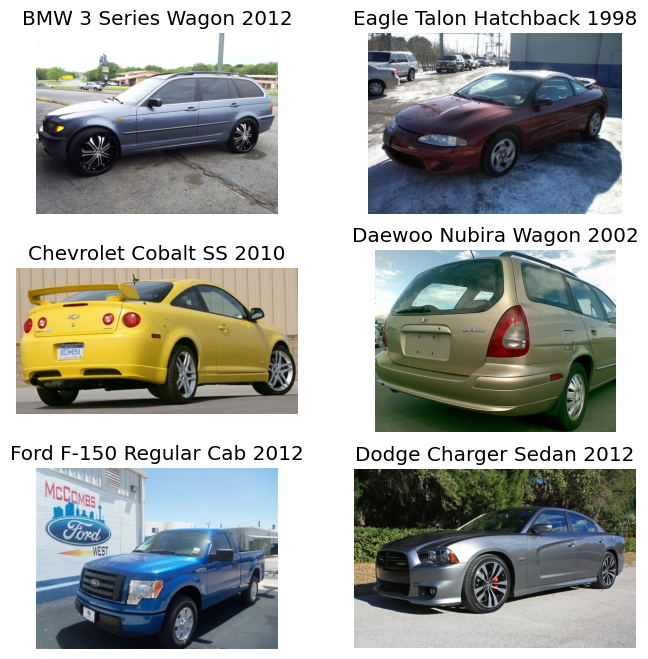

In [7]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 2, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trdata), size=(1,)).item()
    img, labelid = trdata[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(name(labelid))
    plt.axis("off")
    plt.imshow(img)
plt.show()

In [8]:
path = Path(os.path.join('stanford_cars','cars_train'))

# names = os.listdir(path)
# for name in names:
#     int(name[:-4]) - 1

In [9]:
with open(os.path.join('stanford_cars','devkit','train_perfect_preds.txt'), 'r') as file:
    labels = file.read().split('\n')

In [10]:
# for ind,i in enumerate(labels):
#     labels[ind] = int(i)

In [11]:
def get_label(fname):
    id = int(fname.name[-9:-4])
#     print(id)
    cls = int(labels[id-1])-1
#     print(cls)
    return name(cls)

In [34]:
torch.cuda.empty_cache()

In [35]:
cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,
    get_y=get_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(256))
dls = cars.dataloaders(path, bs=256 ,device=torch.device('cuda'))

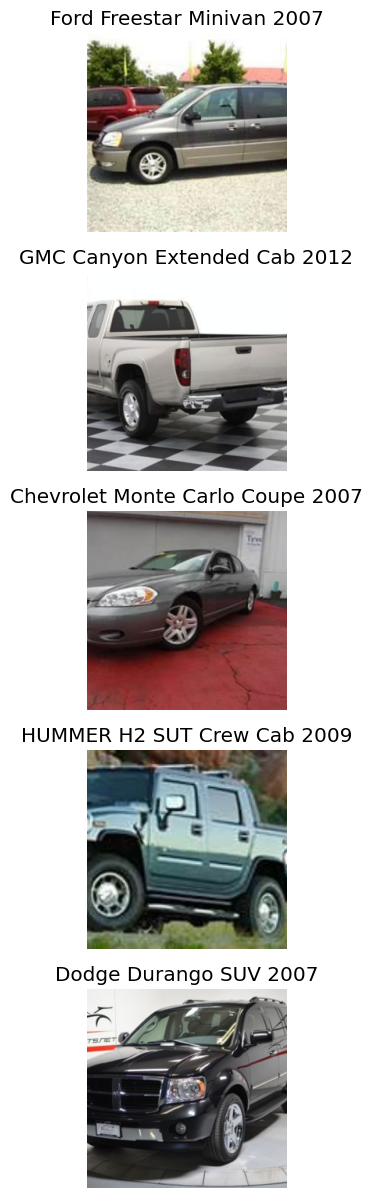

In [36]:
dls.show_batch(nrows=5, ncols=1)

In [37]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

In [38]:
learn.model.cuda()
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,6.630935,4.606568,0.918305,01:09


epoch,train_loss,valid_loss,error_rate,time
0,4.865376,3.740779,0.819410,01:20
1,4.040588,3.371603,0.759214,01:20


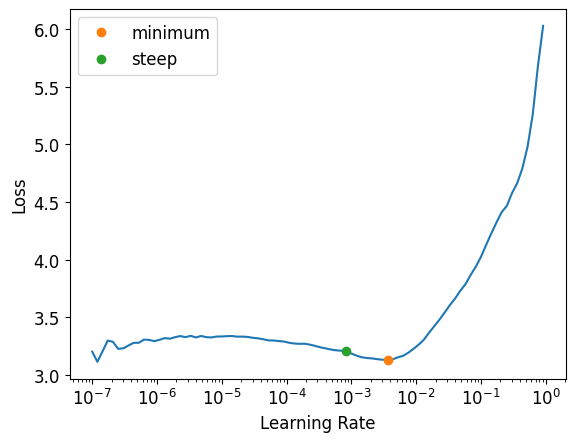

In [40]:
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [41]:
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,3.613658,7.741672,0.957002,01:23
1,3.373181,2.792350,0.680590,01:24
2,2.673779,1.913338,0.490172,01:24


In [42]:
learn.unfreeze()

SuggestedLRs(valley=0.00019054606673307717)

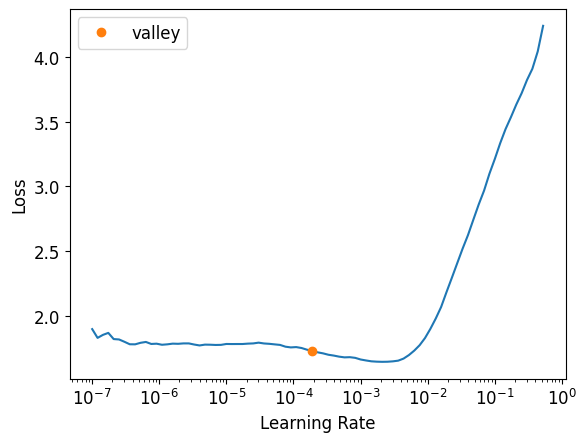

In [43]:
learn.lr_find()

In [44]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,error_rate,time
0,1.670127,1.791557,0.449631,01:22
1,1.468433,1.639658,0.409091,01:21
2,1.194225,1.388951,0.372236,01:21
3,0.947347,1.211000,0.316953,01:25
4,0.772869,1.172400,0.309582,01:24


In [45]:
learn.fit_one_cycle(3, 1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.507655,1.161684,0.299754,01:26
1,0.477989,1.126914,0.300369,01:28
2,0.437671,1.103654,0.291155,01:28


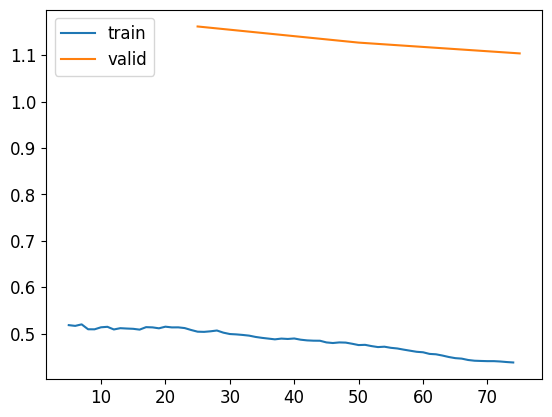

In [46]:
learn.unfreeze()
learn.recorder.plot_loss()

In [49]:
learn.save('model.pkl',with_opt=False)

Path('models/model.pkl.pth')

In [50]:
learn.export('model.pkl')

In [57]:
learn.predict('AcuraTLType-S2008.jpg')[0]

'Acura TL Sedan 2012'

NameError: name 'gr' is not defined

In [63]:
load_learner('models/model.pth')

AttributeError: 'collections.OrderedDict' object has no attribute 'dls'